<a href="https://colab.research.google.com/github/ManjotSran/Deep-Learning-Project-for-diabetes-prediction/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import files

# Use the file upload dialog
uploaded = files.upload()

# Access the uploaded file
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")


Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv
Uploaded file: pima-indians-diabetes.data.csv


In [3]:
import pandas as pd
data = pd.read_csv('pima-indians-diabetes.data.csv')
data.head(5)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [68]:
data.isnull().sum() # We have no missing value in  our dataset.

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

In [51]:
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [52]:
# define the Keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
# compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:

# fit the Keras model on the dataset
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 14.1082 - accuracy: 0.3516
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0267 - accuracy: 0.4870
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.6146
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6406
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6497
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6497
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6693
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.6536
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6562
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6667
Epoch 11

In [55]:
# evaluate the Keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7591
Accuracy: 75.91


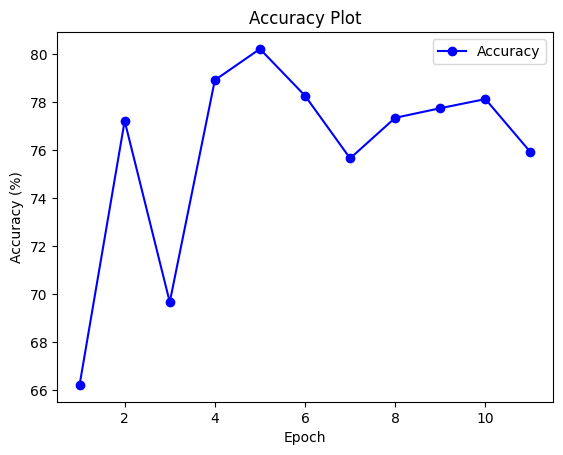

In [56]:
# Following is an accuracy plot after running the model 10 times. 
# It was found that our model is 75% accurate.
import matplotlib.pyplot as plt

accuracies = [66.21, 77.21, 69.66, 78.91, 80.21, 78.26, 75.65, 77.34, 77.74, 78.12, 75.91]
epochs = range(1, len(accuracies) + 1)

plt.plot(epochs, accuracies, 'bo-', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Plot')
plt.legend()

plt.show()


In [58]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

24/24 [==============================] - 0s 1ms/step


In [63]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 100 cases
for i in range(100):
 print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

24/24 [==============================] - 0s 1ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 1 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 0 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 1 (expected 1)
[5.0, 166.

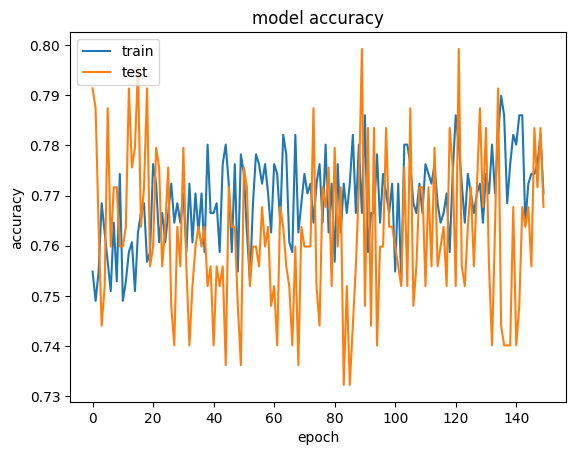

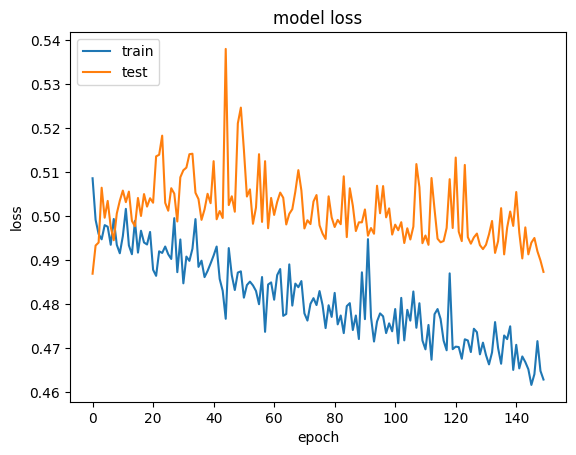

In [65]:
# summarize history for accuracy
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

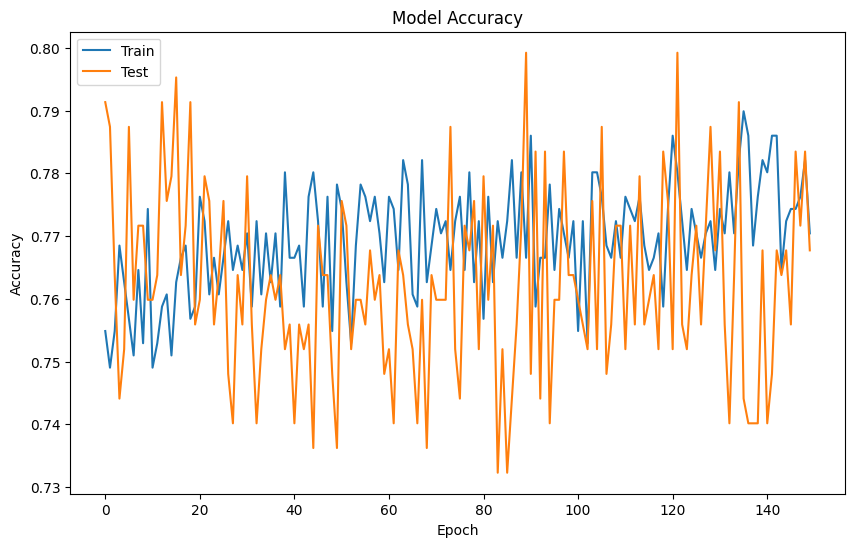

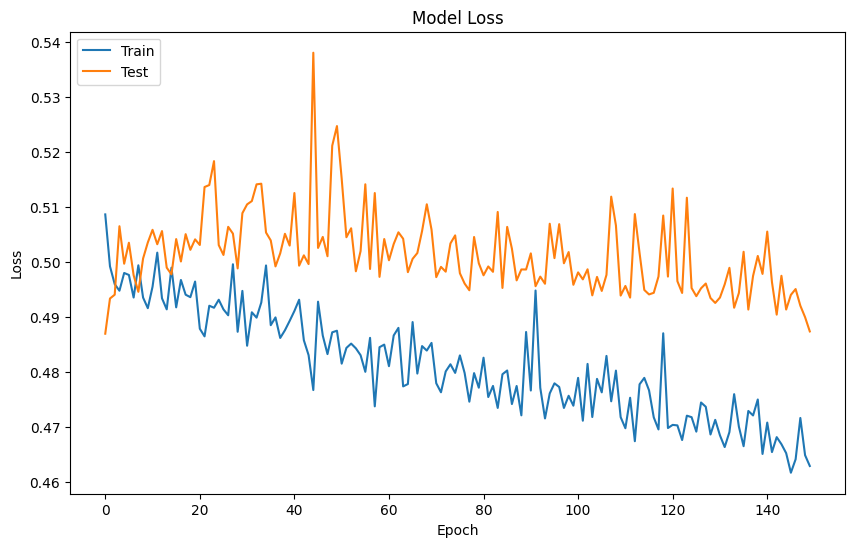

In [66]:
import matplotlib.pyplot as plt

# Your code for training the model and obtaining the history

# Increase the width of the plots
plt.figure(figsize=(10, 6))  # Adjust the width as per your preference

# Plot the accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Increase the width of the plots
plt.figure(figsize=(10, 6))  # Adjust the width as per your preference

# Plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


We have found that our model is about 75% accurate. Now, I'm going to further tune this model to improve its accuracy. 

In [70]:
data.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
from google.colab import files

# Use the file upload dialog
uploaded = files.upload()

# Access the uploaded file
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv
Uploaded file: pima-indians-diabetes.data.csv


In [61]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import Callback

# Custom callback to print progress after each epoch
class PrintProgressCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch+1}/{self.params["epochs"]}')
        print(f'Loss: {logs["loss"]:.4f} - Accuracy: {logs["accuracy"]:.4f}')

# Load the dataset
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=',')

# Split into input (X) and output (y) variables
X = dataset[:, 0:8]
y = dataset[:, 8]

# Perform feature standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the Keras model on the standardized dataset
history = model.fit(X_scaled, y, epochs=150, batch_size=10, verbose=0, callbacks=[PrintProgressCallback()])

# Make class predictions with the model
predictions = (model.predict(X_scaled) > 0.5).astype(int)


Epoch 1/150
Loss: 0.6378 - Accuracy: 0.6250
Epoch 2/150
Loss: 0.5676 - Accuracy: 0.7174
Epoch 3/150
Loss: 0.5227 - Accuracy: 0.7474
Epoch 4/150
Loss: 0.4986 - Accuracy: 0.7656
Epoch 5/150
Loss: 0.4846 - Accuracy: 0.7695
Epoch 6/150
Loss: 0.4762 - Accuracy: 0.7669
Epoch 7/150
Loss: 0.4709 - Accuracy: 0.7747
Epoch 8/150
Loss: 0.4664 - Accuracy: 0.7747
Epoch 9/150
Loss: 0.4630 - Accuracy: 0.7669
Epoch 10/150
Loss: 0.4586 - Accuracy: 0.7799
Epoch 11/150
Loss: 0.4571 - Accuracy: 0.7839
Epoch 12/150
Loss: 0.4530 - Accuracy: 0.7812
Epoch 13/150
Loss: 0.4511 - Accuracy: 0.7747
Epoch 14/150
Loss: 0.4503 - Accuracy: 0.7734
Epoch 15/150
Loss: 0.4466 - Accuracy: 0.7760
Epoch 16/150
Loss: 0.4449 - Accuracy: 0.7773
Epoch 17/150
Loss: 0.4445 - Accuracy: 0.7747
Epoch 18/150
Loss: 0.4414 - Accuracy: 0.7773
Epoch 19/150
Loss: 0.4398 - Accuracy: 0.7786
Epoch 20/150
Loss: 0.4382 - Accuracy: 0.7760
Epoch 21/150
Loss: 0.4375 - Accuracy: 0.7812
Epoch 22/150
Loss: 0.4358 - Accuracy: 0.7734
Epoch 23/150
Loss: 

In [62]:
# Evaluate the model
loss, accuracy = model.evaluate(X_scaled, y)
print(f'Accuracy: {accuracy*100:.2f}%')

24/24 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8372
Accuracy: 83.72%


***After re-running the model 5 times, it gives an average accuracy of 82.91% which is a significant improvement from earlier average of 75%. So, standardization improves the accuracy of the model when our features have varying scales.***

In [25]:
# summarize the first 50 cases
for i in range(700):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 1 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 1 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 0 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 1 (expected 1)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0] => 1 (expect

In [55]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LambdaCallback
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=',')

# Split into input (X) and output (y) variables
X = dataset[:, 0:8]
y = dataset[:, 8]

# Normalize the input data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Define the Keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the number of epochs and batch size
num_epochs = 150
batch_size = 10

# Define a callback function to print the epoch-wise output
def print_epoch_output(epoch, logs):
    print("Epoch {}/{}".format(epoch + 1, num_epochs))
    print("Loss: {:.4f} - Accuracy: {:.4f}".format(logs['loss'], logs['accuracy']))

# Create a list to store the epoch-wise outputs
epoch_outputs = []

# Define the callback to append the output to the list
output_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: epoch_outputs.append({'epoch': epoch, 'logs': logs}))

# Fit the Keras model with the callback
model.fit(X_normalized, y, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[output_callback])

# Print the epoch-wise outputs
for epoch_output in epoch_outputs:
    print_epoch_output(epoch_output['epoch'], epoch_output['logs'])


Epoch 1/150
Loss: 0.6742 - Accuracy: 0.5690
Epoch 2/150
Loss: 0.6287 - Accuracy: 0.6523
Epoch 3/150
Loss: 0.6155 - Accuracy: 0.6654
Epoch 4/150
Loss: 0.6030 - Accuracy: 0.6706
Epoch 5/150
Loss: 0.5905 - Accuracy: 0.7044
Epoch 6/150
Loss: 0.5844 - Accuracy: 0.6927
Epoch 7/150
Loss: 0.5720 - Accuracy: 0.7174
Epoch 8/150
Loss: 0.5646 - Accuracy: 0.7122
Epoch 9/150
Loss: 0.5550 - Accuracy: 0.7096
Epoch 10/150
Loss: 0.5506 - Accuracy: 0.7174
Epoch 11/150
Loss: 0.5444 - Accuracy: 0.7279
Epoch 12/150
Loss: 0.5356 - Accuracy: 0.7344
Epoch 13/150
Loss: 0.5320 - Accuracy: 0.7370
Epoch 14/150
Loss: 0.5251 - Accuracy: 0.7383
Epoch 15/150
Loss: 0.5216 - Accuracy: 0.7396
Epoch 16/150
Loss: 0.5154 - Accuracy: 0.7409
Epoch 17/150
Loss: 0.5133 - Accuracy: 0.7539
Epoch 18/150
Loss: 0.5080 - Accuracy: 0.7578
Epoch 19/150
Loss: 0.5070 - Accuracy: 0.7539
Epoch 20/150
Loss: 0.5020 - Accuracy: 0.7591
Epoch 21/150
Loss: 0.4972 - Accuracy: 0.7643
Epoch 22/150
Loss: 0.4949 - Accuracy: 0.7630
Epoch 23/150
Loss: 

In [56]:
# Evaluate the model
_, accuracy = model.evaluate(X_normalized, y)
print('Accuracy: %.2f' % (accuracy * 100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7891
Accuracy: 78.91


**We found accuracy after standardization was 82.91% and the accuracy after normalization is 79.594%, it means that standardization performed slightly better in this case. **


In [60]:
# summarize the first 100 cases
for i in range(50):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 1 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 1 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 1 (expected 1)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0] => 1 (expect